<a href="https://colab.research.google.com/github/gaeunkim0721/CNN-Cats-Dogs/blob/main/Basic_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data\\*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data\\*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


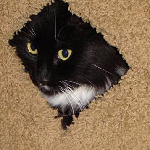

In [ ]:
print(train_imgs[99].shape)
array_to_img(train_imgs[99])

In [ ]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',  padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        9280      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)            

In [ ]:
#from IPython.display import SVG
#from tensorflow.python.keras.utils.vis_utils import model_to_dot
#
#SVG(model_to_dot(model, show_shapes=True, 
#                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 86s 830ms/step - loss: 1.3790 - accuracy: 0.5158 - val_loss: 0.6622 - val_accuracy: 0.5620
Epoch 2/30
100/100 [==============================] - 80s 797ms/step - loss: 0.6530 - accuracy: 0.6174 - val_loss: 0.5935 - val_accuracy: 0.6890
Epoch 3/30
100/100 [==============================] - 81s 807ms/step - loss: 0.5422 - accuracy: 0.7345 - val_loss: 0.7243 - val_accuracy: 0.6140
Epoch 4/30
100/100 [==============================] - 86s 859ms/step - loss: 0.4942 - accuracy: 0.7621 - val_loss: 0.5852 - val_accuracy: 0.7120
Epoch 5/30
100/100 [==============================] - 85s 850ms/step - loss: 0.3850 - accuracy: 0.8366 - val_loss: 0.6136 - val_accuracy: 0.7180
Epoch 6/30
100/100 [==============================] - 84s 837ms/step - loss: 0.2823 - accuracy: 0.8754 - val_loss: 0.6646 - val_accuracy: 0.7110
Epoch 7/30
100/100 [==============================] - 86s 862ms/step - loss: 0.1811 - accuracy: 0.9263 - val_loss: 0.7618 - val_ac

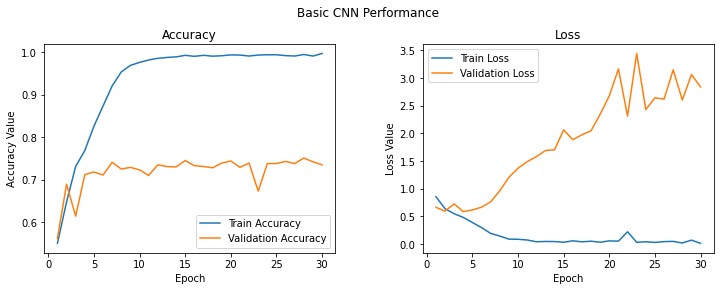

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
                              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 148, 148, 16)      64        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        9280      
_________________________________________________________________
batch_normalization_5 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)      

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 110s 1s/step - loss: 2.6014 - accuracy: 0.5645 - val_loss: 0.7187 - val_accuracy: 0.5050
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.8344 - accuracy: 0.6070 - val_loss: 0.9336 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 110s 1s/step - loss: 0.6793 - accuracy: 0.6406 - val_loss: 0.7854 - val_accuracy: 0.5130
Epoch 4/30
100/100 [==============================] - 108s 1s/step - loss: 0.6054 - accuracy: 0.6954 - val_loss: 0.7612 - val_accuracy: 0.5300
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5457 - accuracy: 0.7422 - val_loss: 0.6830 - val_accuracy: 0.6340
Epoch 6/30
100/100 [==============================] - 114s 1s/step - loss: 0.4731 - accuracy: 0.8025 - val_loss: 0.6911 - val_accuracy: 0.7210
Epoch 7/30
100/100 [==============================] - 114s 1s/step - loss: 0.4021 - accuracy: 0.8286 - val_loss: 0.6901 - val_accuracy: 0.7040

KeyboardInterrupt: 

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('cats_dogs_basic_cnn.h5')

### Model Case 3 VGG16

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
model.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
                              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 512)       1

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 222s 2s/step - loss: 2.2974 - accuracy: 0.4919 - val_loss: 0.6918 - val_accuracy: 0.5600
Epoch 2/30
100/100 [==============================] - 221s 2s/step - loss: 0.6994 - accuracy: 0.5132 - val_loss: 0.6923 - val_accuracy: 0.5120
Epoch 3/30
100/100 [==============================] - 218s 2s/step - loss: 0.7503 - accuracy: 0.5516 - val_loss: 0.6913 - val_accuracy: 0.5560
Epoch 4/30
100/100 [==============================] - 212s 2s/step - loss: 0.6963 - accuracy: 0.5698 - val_loss: 0.6747 - val_accuracy: 0.5540
Epoch 5/30
100/100 [==============================] - 224s 2s/step - loss: 0.6689 - accuracy: 0.5936 - val_loss: 0.7079 - val_accuracy: 0.5670
Epoch 6/30
100/100 [==============================] - 226s 2s/step - loss: 0.6584 - accuracy: 0.6208 - val_loss: 0.7106 - val_accuracy: 0.6060
Epoch 7/30
100/100 [==============================] - 217s 2s/step - loss: 0.6429 - accuracy: 0.6690 - val_loss: 0.7701 - val_accuracy: 0.6440

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('dogs_cats_aug.h5')